In [1]:
import pandas as pd
import matplotlib.pyplot as plt

data_balanced = {
    "Initial State": [0, 0, 1, 1, 2, 2, 3, 3, 4, 4, 5, 5],
    "Optimizer": [
        "BO",
        "DE",
        "BO",
        "DE",
        "BO",
        "DE",
        "BO",
        "DE",
        "BO",
        "DE",
        "BO",
        "DE",
    ],
    "Time (s)": [44, 350, 73, 1452, 115, 364, 7396, 581, 4358, 146, 570, 436],
    "# Iterations": [3, 31, 5, 126, 8, 36, 121, 46, 115, 11, 31, 41],
    "Settling Time (ms)": [
        2400,
        2400,
        1300,
        1800,
        1600,
        1400,
        1100,
        1800,
        1300,
        2500,
        1800,
        1600,
    ],
    "Steady State Error (deg)": [
        2.44,
        1.55,
        0.19,
        3.31,
        -0.53,
        2.09,
        -0.17,
        1.4,
        -0.16,
        17.35,
        1.65,
        4.27,
    ],
    "Kp": [
        10.907680,
        16.0,
        18.249986,
        23.703049,
        6.788276,
        6.432,
        17.801146,
        18.723926,
        4.930022,
        20.154038,
        13.058583,
        9.517405,
    ],
    "Ki": [
        0.330117,
        0.0,
        0.740096,
        0.261754,
        0.049277,
        0.078199,
        0.670552,
        0.162630,
        0.085849,
        0.07,
        0.080072,
        0.078128,
    ],
    "Kd": [
        0.127006,
        0.96426,
        0.708124,
        0.971221,
        0.409347,
        0.782228,
        0.476415,
        0.471297,
        0.263449,
        0.892,
        0.188088,
        0.325520,
    ],
}

df_balanced = pd.DataFrame(data_balanced)

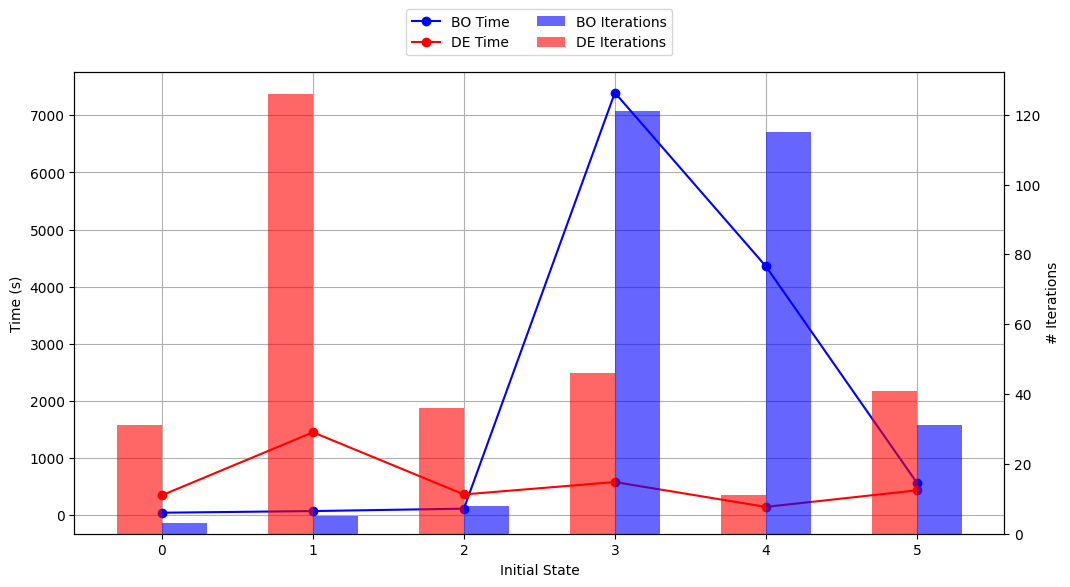

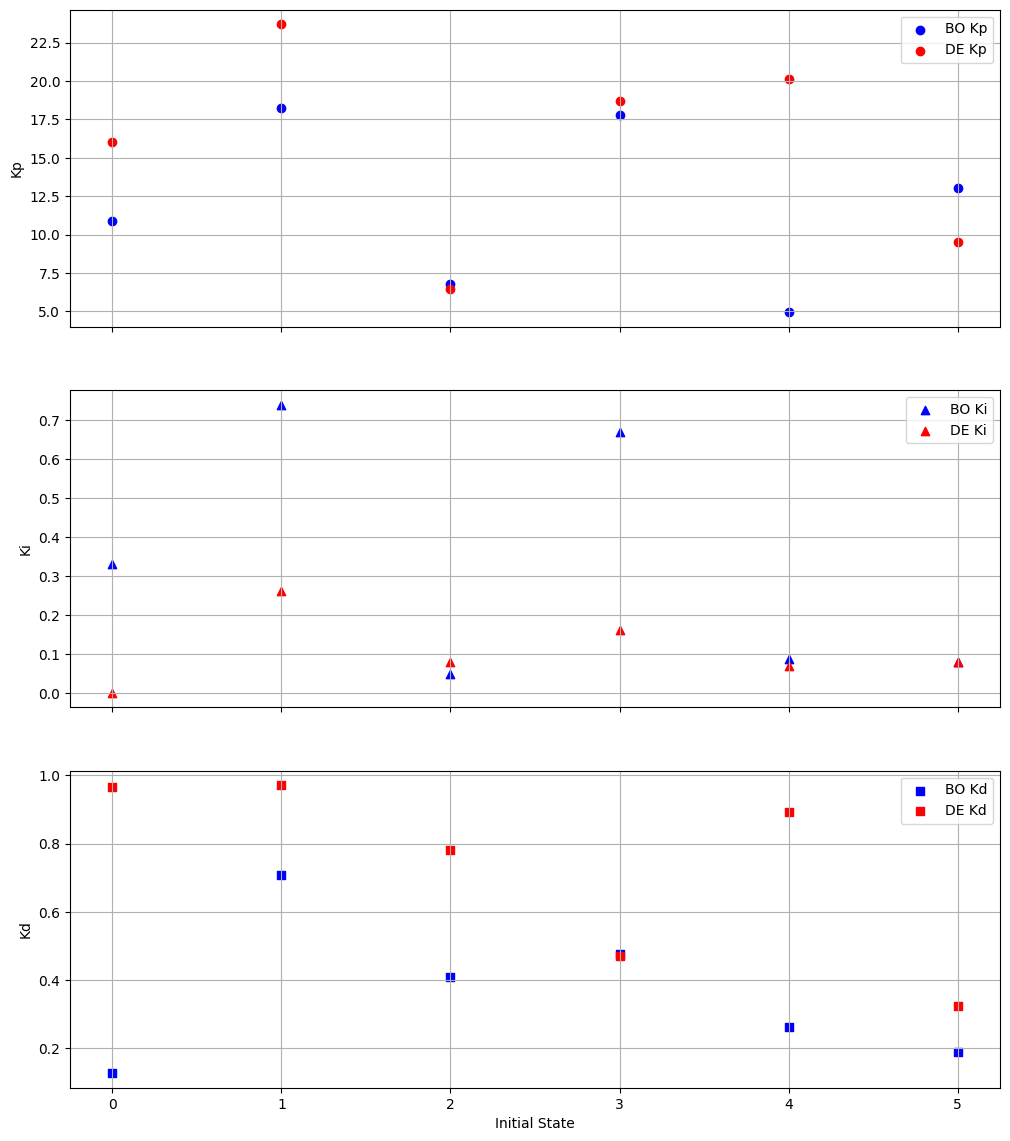

In [2]:
fig, ax1 = plt.subplots(figsize=(12, 6))

for opt_id in df_balanced["Optimizer"].unique():
    subset = df_balanced[df_balanced["Optimizer"] == opt_id]
    ax1.plot(
        subset["Initial State"],
        subset["Time (s)"],
        marker="o",
        label=f"{opt_id} Time",
        linestyle="-",
        color="blue" if opt_id == "BO" else "red",
    )

ax1.set_xlabel("Initial State")
ax1.set_ylabel("Time (s)", color="black")
ax1.tick_params(axis="y", labelcolor="black")
ax1.grid(True)

ax2 = ax1.twinx()
for opt_id in df_balanced["Optimizer"].unique():
    subset = df_balanced[df_balanced["Optimizer"] == opt_id]
    ax2.bar(
        subset["Initial State"] + (0.15 if opt_id == "BO" else -0.15),
        subset["# Iterations"],
        width=0.3,
        alpha=0.6,
        label=f"{opt_id} Iterations",
        color="blue" if opt_id == "BO" else "red",
    )

ax2.set_ylabel("# Iterations", color="black")
ax2.tick_params(axis="y", labelcolor="black")

lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(
    lines + lines2,
    labels + labels2,
    loc="upper center",
    bbox_to_anchor=(0.5, 1.15),
    ncol=2,
)

# plt.title("Iterations and Time by Initial State and Optimizer")
plt.savefig("rq2_iterations_time_balanced.png", bbox_inches="tight", dpi=150)
plt.show()

fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(12, 14), sharex=True)

ax1.scatter(
    df_balanced[df_balanced["Optimizer"] == "BO"]["Initial State"],
    df_balanced[df_balanced["Optimizer"] == "BO"]["Kp"],
    color="blue",
    label="BO Kp",
    marker="o",
)
ax1.scatter(
    df_balanced[df_balanced["Optimizer"] == "DE"]["Initial State"],
    df_balanced[df_balanced["Optimizer"] == "DE"]["Kp"],
    color="red",
    label="DE Kp",
    marker="o",
)
ax1.set_ylabel("Kp")
ax1.grid(True)
ax1.legend()

ax2.scatter(
    df_balanced[df_balanced["Optimizer"] == "BO"]["Initial State"],
    df_balanced[df_balanced["Optimizer"] == "BO"]["Ki"],
    color="blue",
    label="BO Ki",
    marker="^",
)
ax2.scatter(
    df_balanced[df_balanced["Optimizer"] == "DE"]["Initial State"],
    df_balanced[df_balanced["Optimizer"] == "DE"]["Ki"],
    color="red",
    label="DE Ki",
    marker="^",
)
ax2.set_ylabel("Ki")
ax2.grid(True)
ax2.legend()

ax3.scatter(
    df_balanced[df_balanced["Optimizer"] == "BO"]["Initial State"],
    df_balanced[df_balanced["Optimizer"] == "BO"]["Kd"],
    color="blue",
    label="BO Kd",
    marker="s",
)
ax3.scatter(
    df_balanced[df_balanced["Optimizer"] == "DE"]["Initial State"],
    df_balanced[df_balanced["Optimizer"] == "DE"]["Kd"],
    color="red",
    label="DE Kd",
    marker="s",
)
ax3.set_xlabel("Initial State")
ax3.set_ylabel("Kd")
ax3.grid(True)
ax3.legend()

# plt.suptitle('PID Gains by Initial State and Optimizer (Scatter Plot Visualization)')
plt.savefig("rq2_pid_gains_scatter_balanced.png", bbox_inches="tight", dpi=150)
plt.show()